In [134]:
def read_text(filename):
    with open(filename) as source:
        return ''.join(source.readlines())

In [135]:
import re

natural_1 = read_text('natural_1')
natural_2 = read_text('natural_2')

print(f'Text 1 sample:\n {natural_1[:1000]}\n')
print(f'Text 2 sample:\n {natural_2[:1000]}\n')

natural_1 = re.sub('[\W]', '', natural_1).lower()
natural_2 = re.sub('[\W]', '', natural_2).lower()

print(f'Text 1 preprocessed:\n {natural_1[:1000]}\n')
print(f'Text 2 preprocessed:\n {natural_2[:1000]}\n')

Text 1 sample:
 Now that we’ve seen a few use cases that require multiple Kafka clusters, let’s look at
some common architectural patterns that we’ve successfully used when implementing
these use cases. Before we go into the architectures, we’ll give a brief overview of the
realities of cross-datacenter communications. The solutions we’ll discuss may seem overly complicated without understanding that they represent trade-offs in the face of
specific network conditions.
Some Realities of Cross-Datacenter Communication
The following is a list of some things to consider when it comes to cross-datacenter
communication:
High latencies
Latency of communication between two Kafka clusters increases as the distance
and the number of network hops between the two clusters increase.
Limited bandwidth
Wide area networks (WANs) typically have far lower available bandwidth than
what you’ll see inside a single datacenter, and the available bandwidth can vary
minute to minute. In addition, higher laten

In [136]:
import string
import random
import requests

word_site = "https://www.mit.edu/~ecprice/wordlist.100000"
response = requests.get(word_site).content.splitlines()

words = [x.decode('utf-8') for x in response]

chars=string.ascii_lowercase


def generate_text_of_lenght(length, random_mode=None):
    if random_mode == 'words':
        return ''.join(random.choice(words) for _ in range(length))
    elif random_mode == 'chars':
        return ''.join(random.choice(chars) for _ in range(length))
    else:
        raise Exception(f'illegal random_mode {random_mode}')

def count_matching(text_1, text_2):
    length = len(text_1)
    if length != len(text_1):
        raise Exception('cannot compare texts with different length')

    same_letters = 0

    for i in range (length):
        if text_1[i] == text_2[i]:
            same_letters += 1

    return same_letters / length




In [146]:
import matplotlib.pyplot as plt
import numpy as np

def compare_texts(text_1=None, text_2=None, random_mode=None):
    lengths = np.arange(100, 10000, 100).tolist()

    if text_1 is None:
        text_1 = generate_text_of_lenght(lengths[-1], random_mode)

    if text_2 is None:
        text_2 = generate_text_of_lenght(lengths[-1], random_mode)

    match_history = []

    print(f'Text 1 sample:\n {text_1[:100]}\n')
    print(f'Text 2 sample:\n {text_2[:100]}\n')

    for length in lengths:

        match_history.append(count_matching(text_1[:length], text_2[:length]))
        if length % 1000 == 0:
            print(f'Match rate for texts of length {length} is {match_history[-1]}')

    plt.plot(lengths, match_history)


Both texts are real
Text 1 sample:
 nowthatweveseenafewusecasesthatrequiremultiplekafkaclustersletslookatsomecommonarchitecturalpatterns

Text 2 sample:
 actuallyivealreadygivenyousomeprettygoodreasonswhydddmakessomuchpracticalsenseattheriskofbreakingthe

Match rate for texts of length 1000 is 0.062
Match rate for texts of length 2000 is 0.0625
Match rate for texts of length 3000 is 0.06733333333333333
Match rate for texts of length 4000 is 0.06875
Match rate for texts of length 5000 is 0.07
Match rate for texts of length 6000 is 0.06966666666666667
Match rate for texts of length 7000 is 0.06785714285714285
Match rate for texts of length 8000 is 0.067375
Match rate for texts of length 9000 is 0.06577777777777778


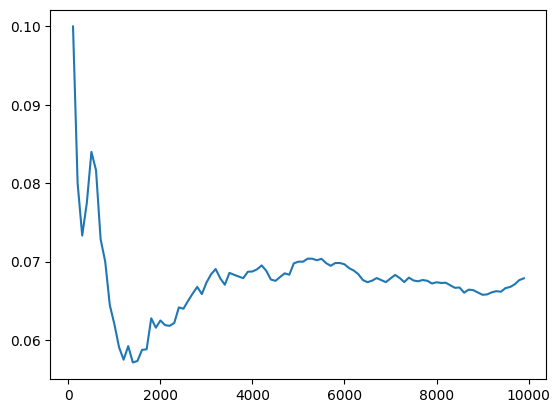

In [147]:
print('Both texts are real')
compare_texts(natural_1, natural_2)

Real text and text from random letters
Text 1 sample:
 nowthatweveseenafewusecasesthatrequiremultiplekafkaclustersletslookatsomecommonarchitecturalpatterns

Text 2 sample:
 xdvphhybaifbcyitdghmrciilummtpdjvxtxsikocewslvyecqztiwfmmmoezvixyjtqhyainysgaggqmityacvlmpyylkyvzurx

Match rate for texts of length 1000 is 0.031
Match rate for texts of length 2000 is 0.046
Match rate for texts of length 3000 is 0.04633333333333333
Match rate for texts of length 4000 is 0.047
Match rate for texts of length 5000 is 0.0442
Match rate for texts of length 6000 is 0.0445
Match rate for texts of length 7000 is 0.04371428571428571
Match rate for texts of length 8000 is 0.0425
Match rate for texts of length 9000 is 0.042777777777777776


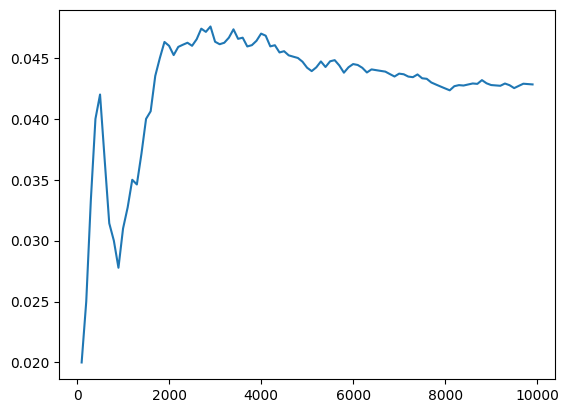

In [148]:
print('Real text and text from random letters')
compare_texts(natural_1, random_mode='chars')

Real text and text from random words
Text 1 sample:
 nowthatweveseenafewusecasesthatrequiremultiplekafkaclustersletslookatsomecommonarchitecturalpatterns

Text 2 sample:
 nitpickitgamerankingscomsallycannabinoidsthorndikerecipesourcebeaujolaisdisposalfreiheitmcnrunwayspr

Match rate for texts of length 1000 is 0.069
Match rate for texts of length 2000 is 0.0635
Match rate for texts of length 3000 is 0.06733333333333333
Match rate for texts of length 4000 is 0.068
Match rate for texts of length 5000 is 0.065
Match rate for texts of length 6000 is 0.06466666666666666
Match rate for texts of length 7000 is 0.06328571428571429
Match rate for texts of length 8000 is 0.06275
Match rate for texts of length 9000 is 0.06388888888888888


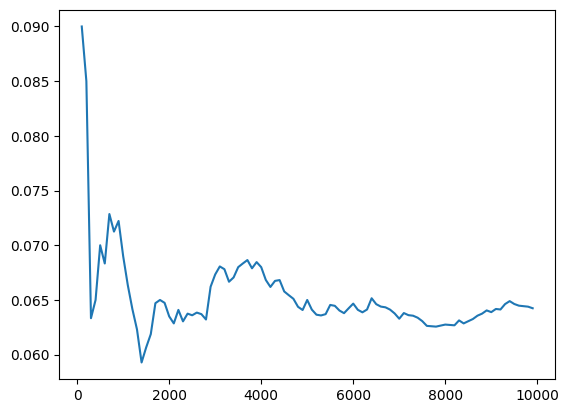

In [149]:
print('Real text and text from random words')
compare_texts(natural_1, random_mode='words')

Both texts from random letters
Text 1 sample:
 quovhfuknzwbskdydkkkbzmmslidoqhntslfiokcspceguowluqlggpyplllwlafyznfknmhgvptcpeiyordfoltwwybrljioedq

Text 2 sample:
 jyjrwwrxaloxuruyzfgozovaoqlrdeompfjmgjbdtuasoezkbrmotgvakohnjbalqyoamfisadgdxcbdxuyemcfptekkgcswoxzp

Match rate for texts of length 1000 is 0.045
Match rate for texts of length 2000 is 0.0455
Match rate for texts of length 3000 is 0.03866666666666667
Match rate for texts of length 4000 is 0.03875
Match rate for texts of length 5000 is 0.0378
Match rate for texts of length 6000 is 0.0385
Match rate for texts of length 7000 is 0.039142857142857146
Match rate for texts of length 8000 is 0.038125
Match rate for texts of length 9000 is 0.03833333333333333


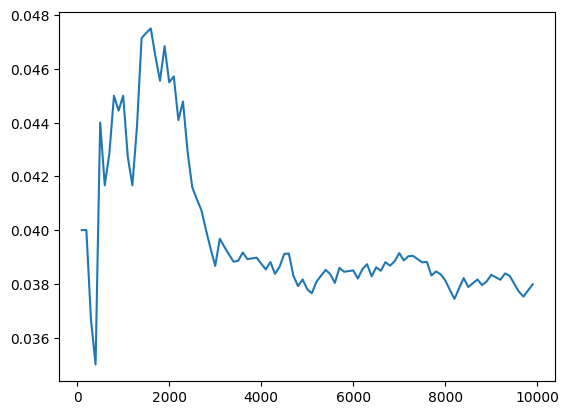

In [150]:
print('Both texts from random letters')
compare_texts(random_mode='chars')

Both texts from random words
Text 1 sample:
 gillettesplintergenomecloggscleanserinstrumentprocomarenalunadulteratedbuffersreorientationseventeen

Text 2 sample:
 glosspostpropositionsmatchpaquintempusflambeaurhusgirbaudjerkambitexhibitorsraiajutlandpurificationk

Match rate for texts of length 1000 is 0.057
Match rate for texts of length 2000 is 0.056
Match rate for texts of length 3000 is 0.059666666666666666
Match rate for texts of length 4000 is 0.061
Match rate for texts of length 5000 is 0.0616
Match rate for texts of length 6000 is 0.062
Match rate for texts of length 7000 is 0.06085714285714286
Match rate for texts of length 8000 is 0.06175
Match rate for texts of length 9000 is 0.06266666666666666


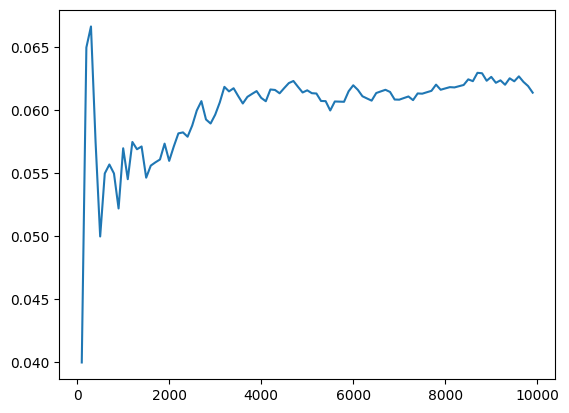

In [151]:
print('Both texts from random words')
compare_texts(random_mode='words')